In [1]:
import matplotlib.pyplot as plt

In [2]:
y=[4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4]
plt.hist(y, bins=range(9))
plt.title("fig. 8.1")

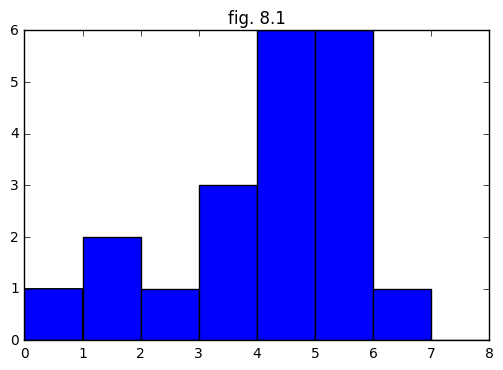

In [3]:
plt.show()

In [4]:
import scipy.misc


In [5]:
def p_y_given_q(q,z):
    #number of combinations of get z things from q things 
    #from q choose z
    return scipy.misc.comb(8,z)*(q**z)*(1-q)**(8-z)


In [6]:
import numpy as np
q= np.linspace(0, 1, 100)
plt.plot(q, p_y_given_q(q,1))
plt.plot(q, p_y_given_q(q,2))
plt.plot(q, p_y_given_q(q,3))
plt.plot(q, p_y_given_q(q,4))
plt.plot(q, p_y_given_q(q,5))
plt.plot(q, p_y_given_q(q,6))
plt.plot(q, p_y_given_q(q,7))
plt.legend(['$yi=1$','$yi=2$','$yi=3$','$yi=4$','$yi=5$','$yi=6$','$yi=7$'])
plt.title("probabilities of number of live seeds")

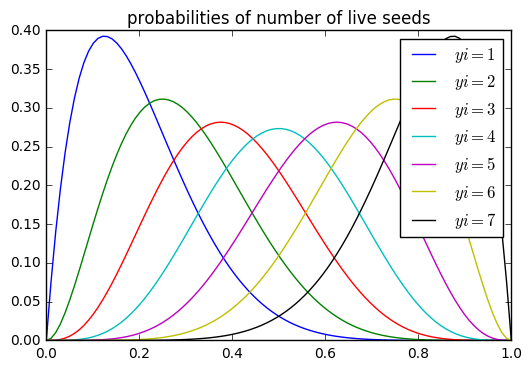

In [7]:
plt.show()

In [8]:
def likelihood(q, z):
    #return the product of array elements over a given axis (here, no axis , 
    #so, all element product)
    return np.prod([scipy.misc.comb(8, yi) * (q**yi) * (1-q)**(8-yi) for yi in z])
def calc_likelihood(X, z):
    return [likelihood(x, z) for x in X]
def log_likelihood(q, z):
    return sum([yi*np.log(q)+(8-yi)*np.log(1-q) for yi in z])+1
def calc_log_likelihood(X, z):
    return [log_likelihood(x, z) for x in X]


In [9]:
#generate a array start at 0.01 end at 0.99 and number of elements are 100
X= np.linspace(0.01, 0.99, 100)
l = calc_likelihood(X, y)
log_l = calc_log_likelihood(X,y)

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].plot(X, l)
ax[0].set_title("Likelihood")
ax[0].set_xlabel("$q$")
ax[1].plot(X, log_l)
ax[1].set_title("log likelihood")
ax[1].set_xlabel("$q$")

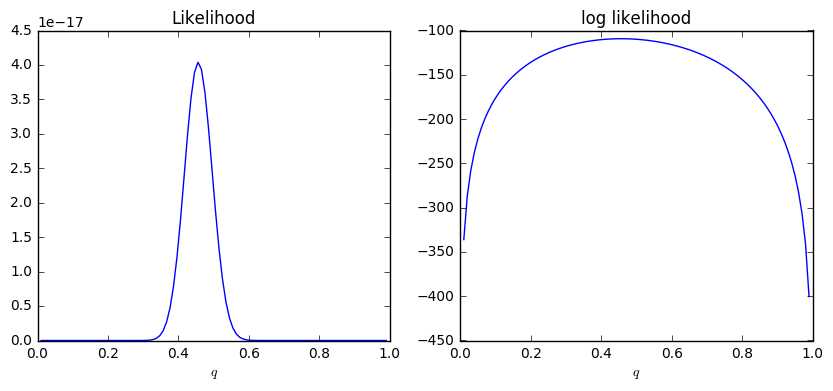

In [11]:
plt.show()

In [12]:
X = np.linspace(0.23, 0.64, 30)
l = calc_log_likelihood(X,y)
plt.plot(X,l,'o')
plt.xlabel('sruvive probability')
plt.ylabel('Log(likelihood)')
plt.title('discontinuous q')

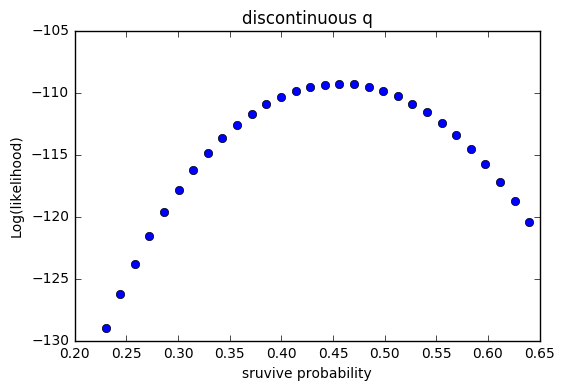

In [13]:
plt.show()

In [14]:
#step of 1 of -1 (random), and 
def naive_hill_climb(X, likelihood):
    history= []
    def next():
        #random dicision of steo is 1, or -1
        return 1 if np.random.random()>0.5 else -1
    def update_judge(new_likelihood, current_likelihood):
        #update the likelihood for every step
        return new_likelihood>current_likelihood
    pos=0
    current = likelihood[0]
    while pos<=len(likelihood):
        tmp = pos +next()
        new =likelihood[tmp]
        history.append(X[tmp])
        if update_judge(new, current):
            pos = tmp
            if np.abs(new -current)<0.05:
                #the update is too small
                break
            current = new
    return X[pos], history

In [15]:
X=np.linspace(0.1, 0.9, 100)
l = calc_log_likelihood(X, y)
m,history = naive_hill_climb(X, l)

In [16]:
plt.plot(history)
plt.title("history of q in search")

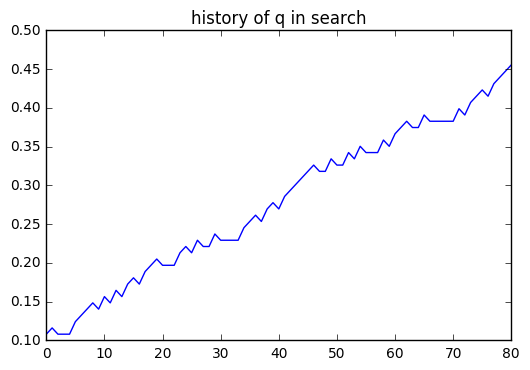

In [17]:
plt.show()

In [18]:
#MCMC algorithm
def metropolis(X, likelihoods, step):
    history=[]
    def next():
        return 1 if np.random.random()>0.5 else -1
    def update_judge(new_likelihood, current_likelihood):
        #compare the likelihood if the exp(update) is larger than random number, then go to the step
        l_rate = np.exp(new_likelihood-current_likelihood)
        #the result may has tolance to negative step sometimes
        return np.random.random()< l_rate
    #started at middle
    pos=70
    current = likelihoods[pos]
    t=0
    while t<step:
        #move at step 1, or -1
        tmp = np.abs(pos+next())
        new = likelihoods[tmp]
        history.append(X[pos])
        if update_judge(new, current):
            pos = tmp
            current = new
        t+=1
    return history

In [19]:
X = np.linspace(0.1, 0.9, 100)
l = calc_log_likelihood(X, y)
ret = metropolis(X, l, 100)
fig,ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(ret)
ax[0].set_title(u'MCMC step 100')
ax[0].set_ylabel('$q$')
ax[1].hist(ret, bins=100)
ax[1].set_xlim(0.1, 0.9)
ax[1].set_title('Histogram of $q$')

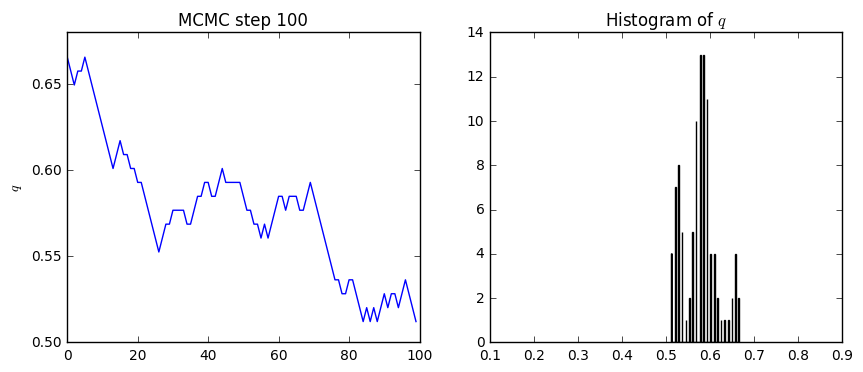

In [20]:
plt.show()

In [21]:
X = np.linspace(0.1, 0.9, 100)
l = calc_log_likelihood(X, y)
ret = metropolis(X, l, 10000)
fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax[0].plot(ret)
ax[0].set_title('MCMC Step 100000')
ax[0].set_ylabel('$q$')
ax[1].hist(ret, bins=100)
ax[1].set_xlim(0.1, 0.9)
ax[1].set_title(u'Histgram of $q$')

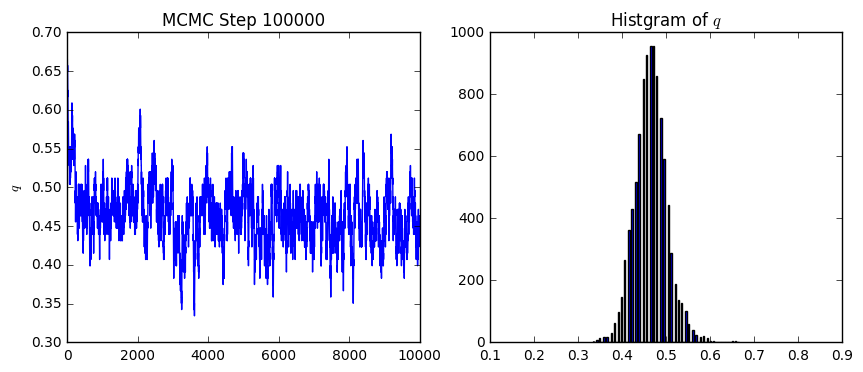

In [22]:
plt.show()

In [23]:
fig = plt.figure(figsize=(4, 4))
plot = fig.add_subplot(1, 1, 1)
X = np.linspace(0.01, 0.99, 100)
l = calc_likelihood(X, y)
plot.plot(X, l/sum(l))
plt.ylabel('$p(q|Y)$')
plt.title('$L(q)/\Sigma(L(q))$')
plt.xlabel('$q$')

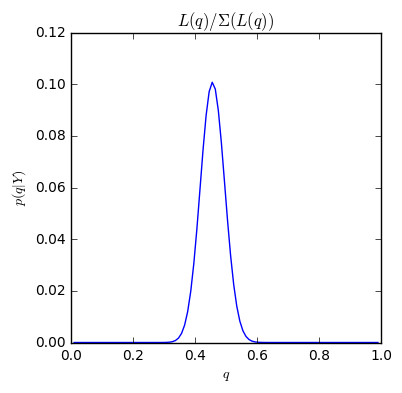

In [24]:
plt.show()